# Bright Motor Company
### Problem Statement : Predict the selling price of cars using customer income, profession, marital status, loan types, and vehicle features at Bright Motor Company.
#### By Mowleen Armstrong

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/Mowleen/OneDrive/Desktop/EDA Practice/bright_automotive_company.csv')

In [4]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


In [5]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


In [7]:
df.isnull().sum()

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

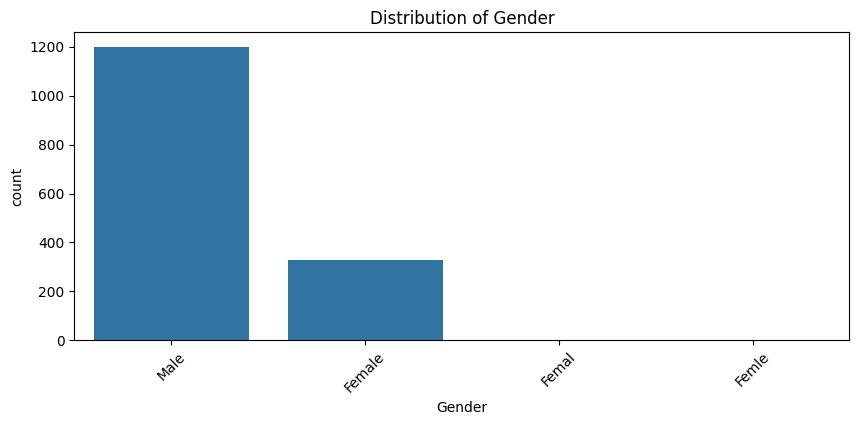

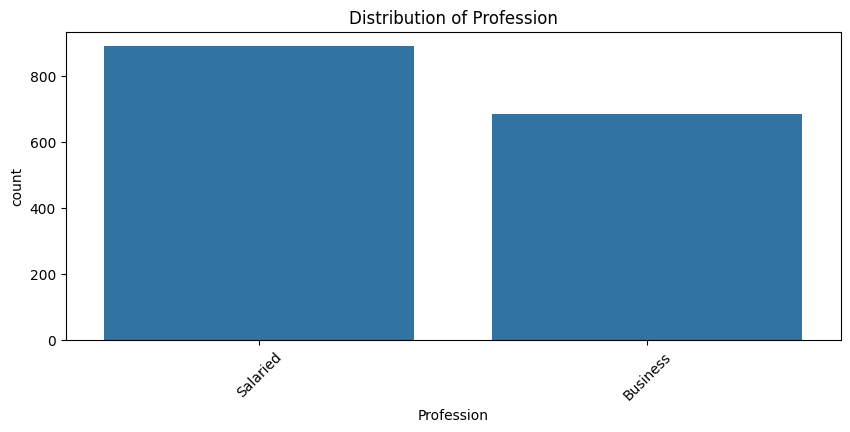

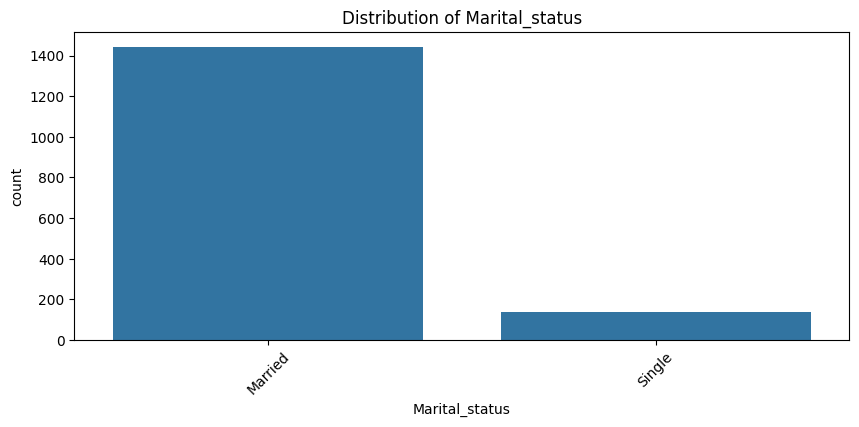

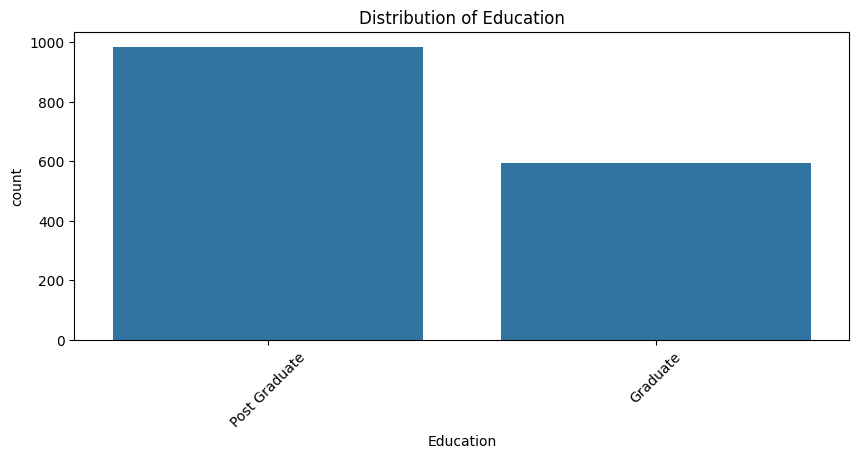

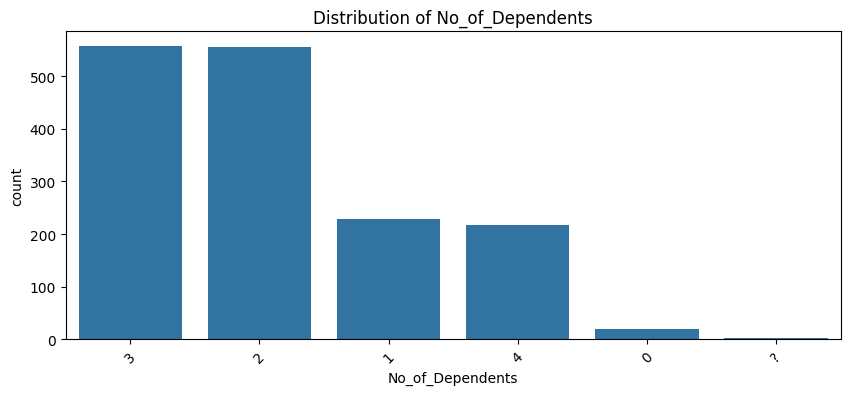

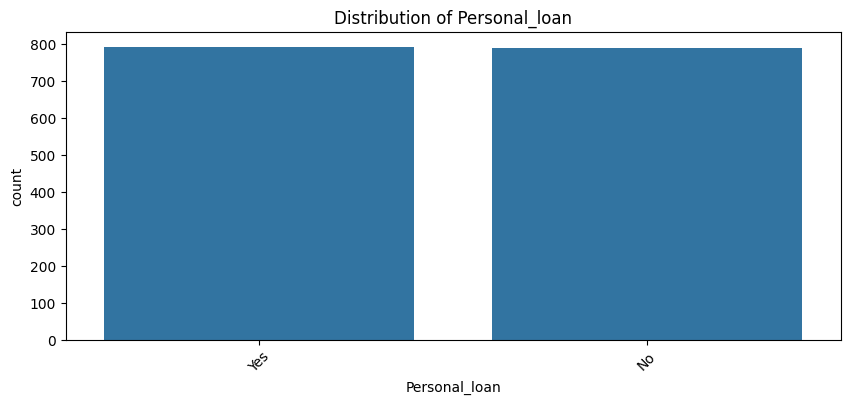

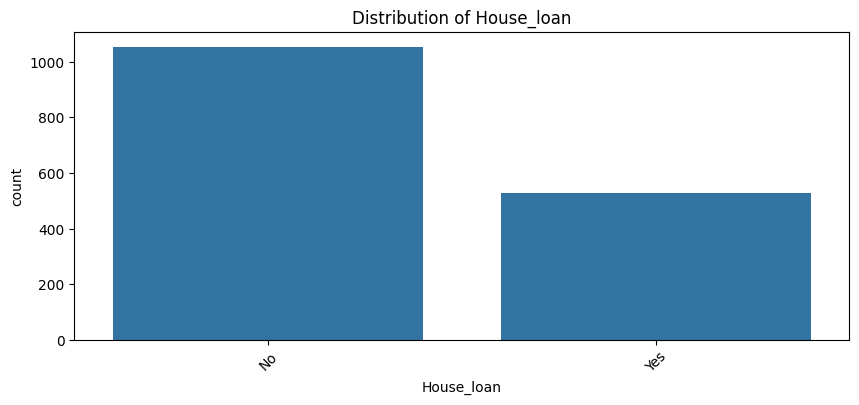

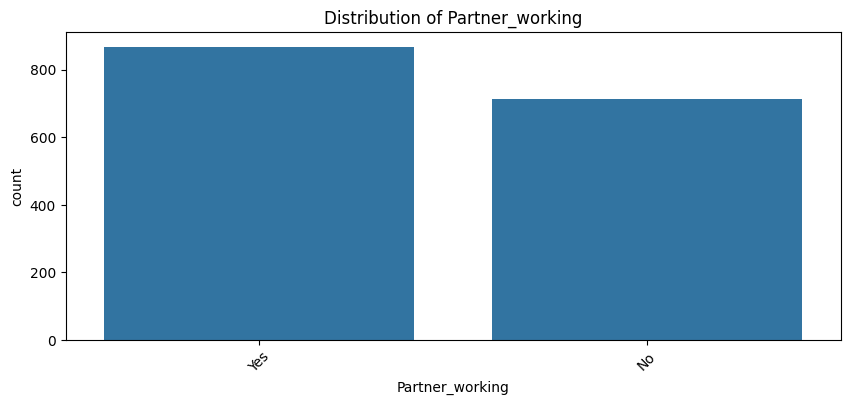

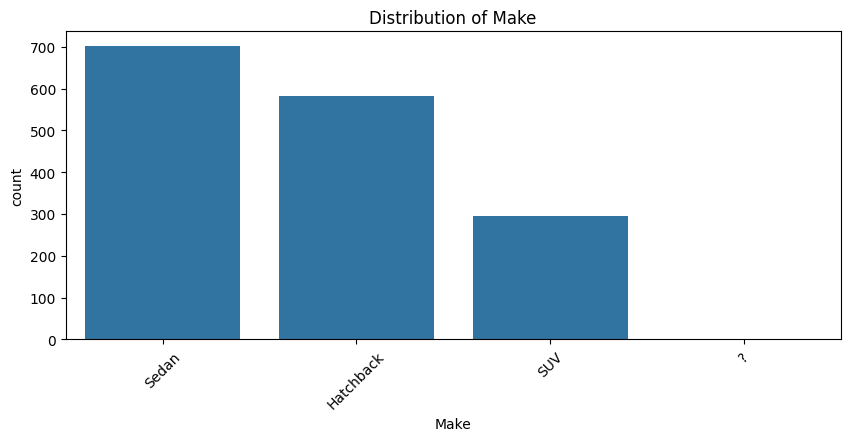

In [8]:
categorical = ['Gender', 'Profession', 'Marital_status', 'Education', 
               'No_of_Dependents', 'Personal_loan', 'House_loan', 
               'Partner_working', 'Make']

for col in categorical:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


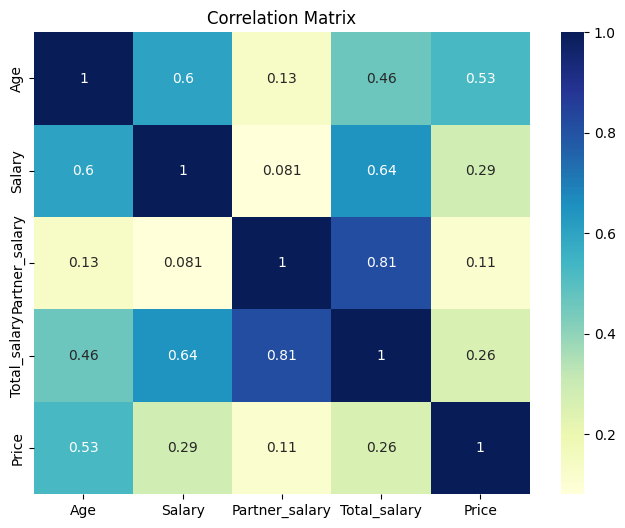

In [9]:
numerical = ['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']

plt.figure(figsize=(8,6))
sns.heatmap(df[numerical].corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

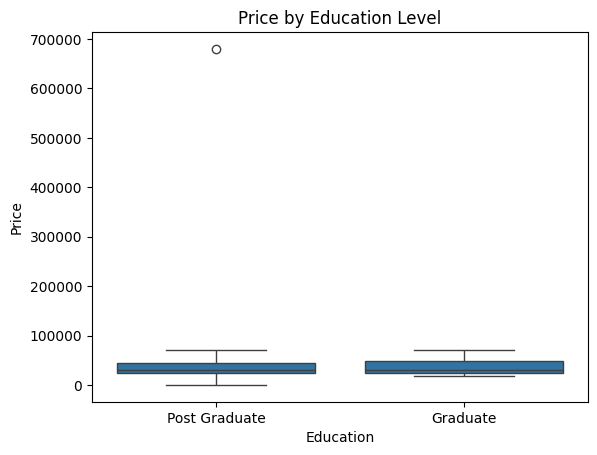

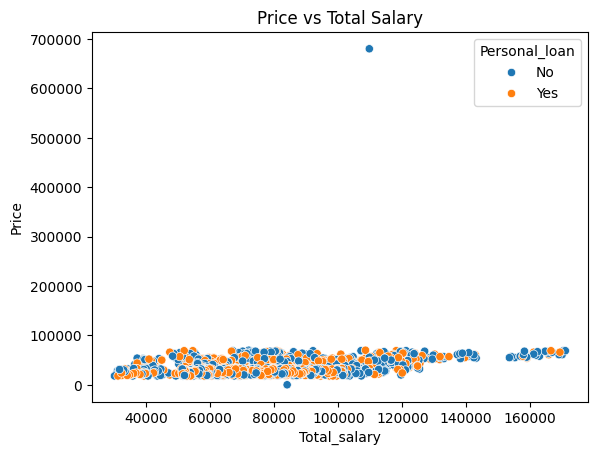

In [10]:
sns.boxplot(data=df, x='Education', y='Price')
plt.title("Price by Education Level")
plt.show()

sns.scatterplot(data=df, x='Total_salary', y='Price', hue='Personal_loan')
plt.title("Price vs Total Salary")
plt.show()


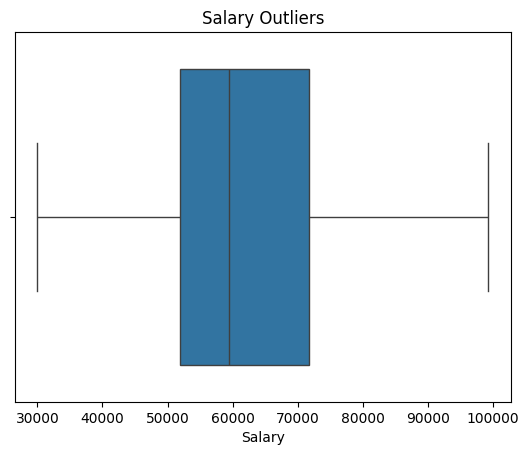

In [11]:
sns.boxplot(data=df, x='Salary')
plt.title("Salary Outliers")
plt.show()


## Handling Missing Values

In [14]:
for column, value in fill_strategies.items():
    df[column] = df[column].fillna(value)


## Feature Engineering

In [15]:
df['Computed_Total_salary'] = df['Salary'] + df['Partner_salary']

In [18]:
df['No_of_Dependents'] = pd.to_numeric(df['No_of_Dependents'], errors='coerce')
df['No_of_Dependents'] = df['No_of_Dependents'].fillna(0)
  # fill remaining NaNs if any


In [17]:
categorical_cols = ['Gender', 'Profession', 'Marital_status', 'Education', 
                    'Personal_loan', 'House_loan', 'Partner_working', 'Make']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


## Feature Target Split

In [20]:
X = df.drop(['Price'], axis=1)
y = df['Price']

## Train - Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model Building

### Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # manually compute RMSE

print("Linear Regression R2:", r2)
print("Linear Regression RMSE:", rmse)

Linear Regression R2: 0.6953426384974262
Linear Regression RMSE: 7259.985397354318


## Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest R2:", r2)
print("Random Forest RMSE:", rmse)

Random Forest R2: 0.3560783962805584
Random Forest RMSE: 10554.712472180616


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

# Load data
df = pd.read_csv("C:/Users/Mowleen/OneDrive/Desktop/EDA Practice/bright_automotive_company.csv")

# --- Fix Missing Values (no inplace) ---
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Profession'] = df['Profession'].fillna(df['Profession'].mode()[0])
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['Partner_salary'] = df['Partner_salary'].fillna(df['Partner_salary'].median())

# Convert dependents to numeric
df['No_of_Dependents'] = pd.to_numeric(df['No_of_Dependents'], errors='coerce')
df['No_of_Dependents'] = df['No_of_Dependents'].fillna(0)

# Encode categorical features
label_encoders = {}
for col in ['Gender', 'Profession', 'Marital_status', 'Education', 'Partner_working']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for future use (optional)

# Define features and targets
features = ['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
            'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Partner_working']

X = df[features]
y_personal = df['Personal_loan']
y_house = df['House_loan']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Logistic Regression for Personal Loan
X_train_p, _, y_train_p, _ = train_test_split(X_scaled, y_personal, test_size=0.2, random_state=42)
model_personal = LogisticRegression(max_iter=500)
model_personal.fit(X_train_p, y_train_p)

# Train Logistic Regression for House Loan
X_train_h, _, y_train_h, _ = train_test_split(X_scaled, y_house, test_size=0.2, random_state=42)
model_house = LogisticRegression(max_iter=500)
model_house.fit(X_train_h, y_train_h)

# Save models and scaler
joblib.dump(model_personal, "model_personal.pkl")
joblib.dump(model_house, "model_house.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']